Hyperparameters search to train keras_retinanet with ImageNet-pretrained resnet50 backbone on Lacmus Drone Dataset v4. Input images are resized to 200x1500 (not to default 800x1333). <br>
Compares mAP and losses during first 1000 steps. <br>Csv fileas are exported from Tensorboard. 

### Utility functions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

In [37]:
csv_dir = "./paperspace/tensorboard-csv"
loss_metrics = ['loss', 'regression_loss', 'classification_loss']
mAP_metric = 'mAP'

In [3]:
def load_dataframe(csv_dir, prefix, metric):
    filepath = os.path.join(csv_dir, prefix + metric + '.csv')
    df = pd.read_csv(filepath)
    df = df[["Step", "Value"]]
    df = df.rename(columns={"Value": metric})
    return df

In [81]:
def plot_metrics(dfs, graph_name, base_dfs=None):

    fig, axis = plt.subplots(1, len(dfs), figsize=(30, 10))
    for i, df_name in enumerate(dfs):
        axis[i].set_title(df_name, fontsize=24)
        dfs[df_name].plot(ax=axis[i], x='Step', y=df_name, label=graph_name)
        if base_dfs:
            base_dfs[df_name].plot(ax=axis[i], x='Step', y=df_name, label='base')    
        axis[i].legend(prop={'size': 20})

In [35]:
def load_mAP(csv_dir, prefix):
    filepath = os.path.join(csv_dir, prefix + mAP_metric + '.csv')
    df = pd.read_csv(filepath)
    return float(df.tail(1)["Value"])

In [68]:
def print_mAP(mAP, base_mAP=0):
    message = "mAP: {0:.4}".format(mAP)
    if base_mAP:
        if (mAP > base_mAP):
            message += " (> base {0:.4})".format(base_mAP)
        else:
            message += " (< base {0:.4})".format(base_mAP)
    print(message)

### Base metrics

Set of parameters to be changed and compared. Train command:<br><br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000  --tensorboard-dir logs/finetuning/base pascal /storage/data/LADDV4_Full >> logs/finetuning/base/output.log</i>

In [69]:
prefix = 'base-'

In [70]:
base_mAP = load_mAP(csv_dir, prefix)
print_mAP(base_mAP)

mAP: 0.6253


In [71]:
base_dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}

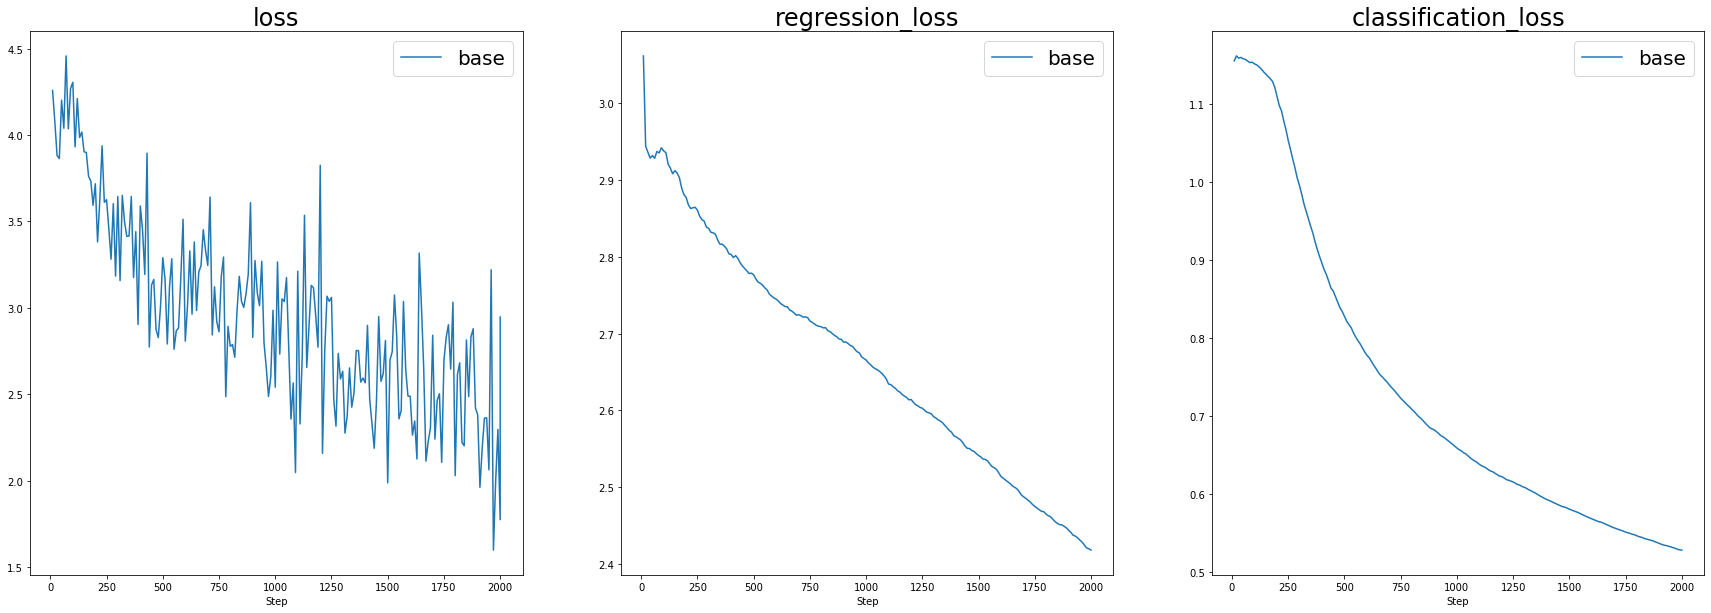

In [82]:
plot_metrics(base_dfs, 'base')

### Default size

Compare to training with default size 800x1333. Command to run:<br><br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2  --tensorboard-dir logs/finetuning/default_size pascal /storage/data/LADDV4_Full >> logs/finetuning/default_size/output.log</i>

In [75]:
prefix = 'default_size-'

In [76]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.2144 (< base 0.6253)


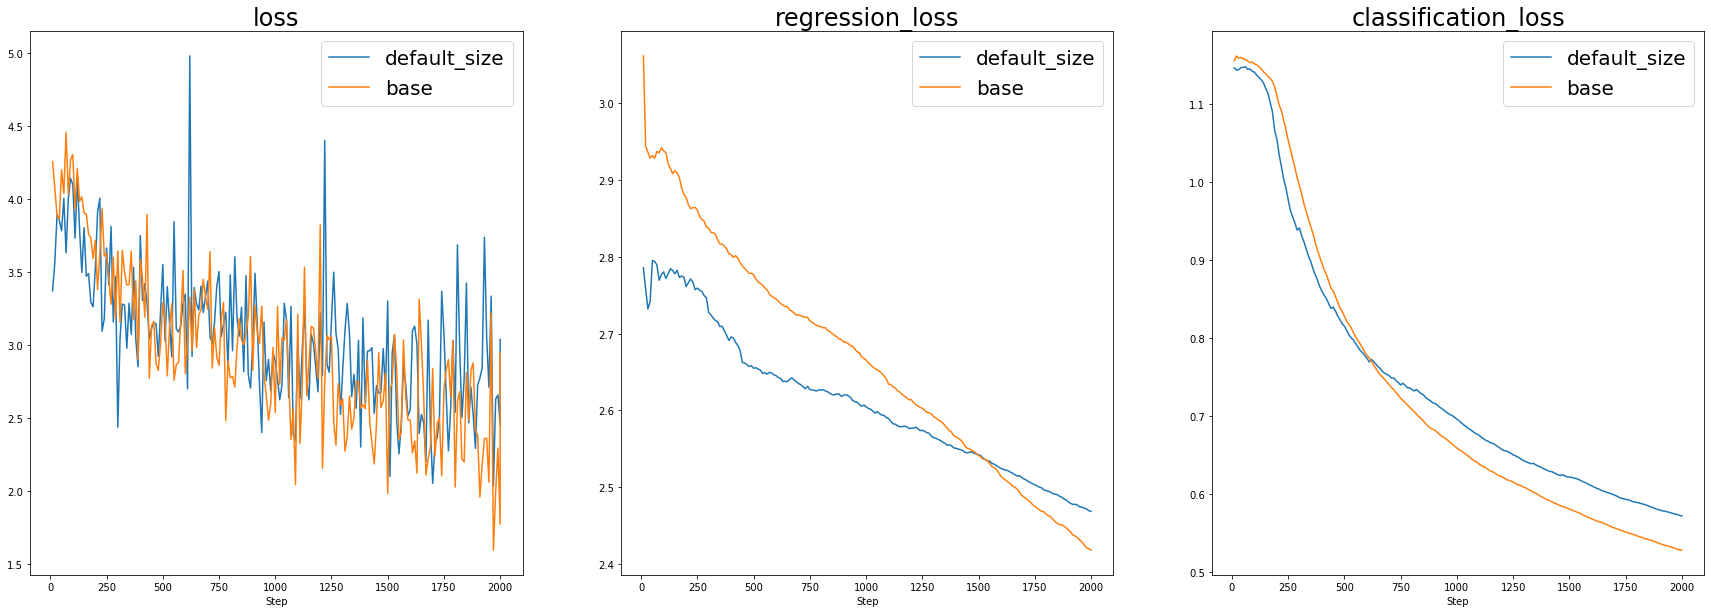

In [83]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'default_size', base_dfs)

### Batch size = 1

Compare to training with batch size = 1. Command to run:<br><br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 1 --image-min-side 1500 --image-max-side 2000 --tensorboard-dir logs/finetuning/batch_size_1 pascal /storage/data/LADDV4_Full >> logs/finetuning/batch_size_1/output.log</i>

In [87]:
prefix = 'batch_size_1-'

In [88]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.7396 (> base 0.6253)


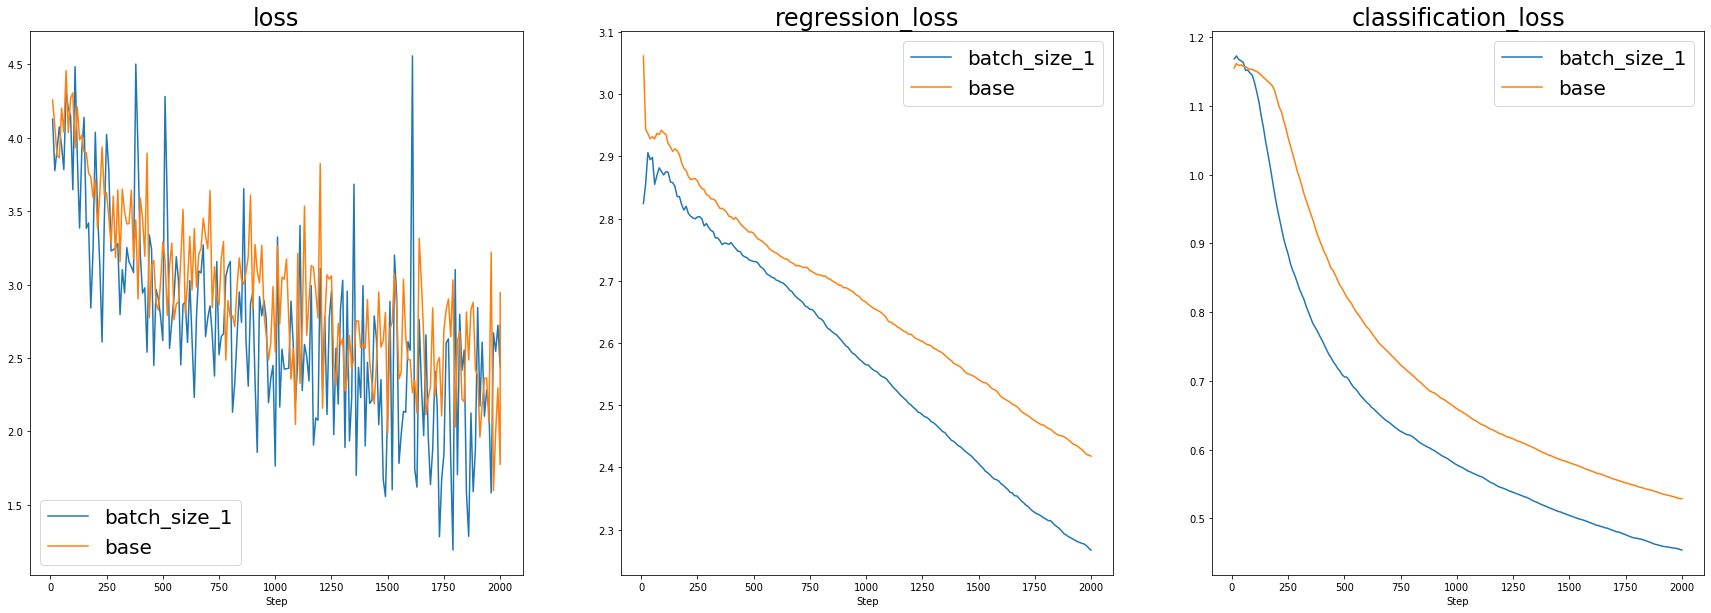

In [89]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'batch_size_1', base_dfs)

### With random_transform

Compare to training with augmentations using random_transform parameter. Command to run:<br><br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --batch-size 2 --image-min-side 1500 --image-max-side 2000 --tensorboard-dir logs/finetuning/with_random_transform pascal /storage/data/LADDV4_Full >> logs/finetuning/with_random_transform/output.log</i>

In [91]:
prefix='with_random_transform-'

In [92]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.5503 (< base 0.6253)


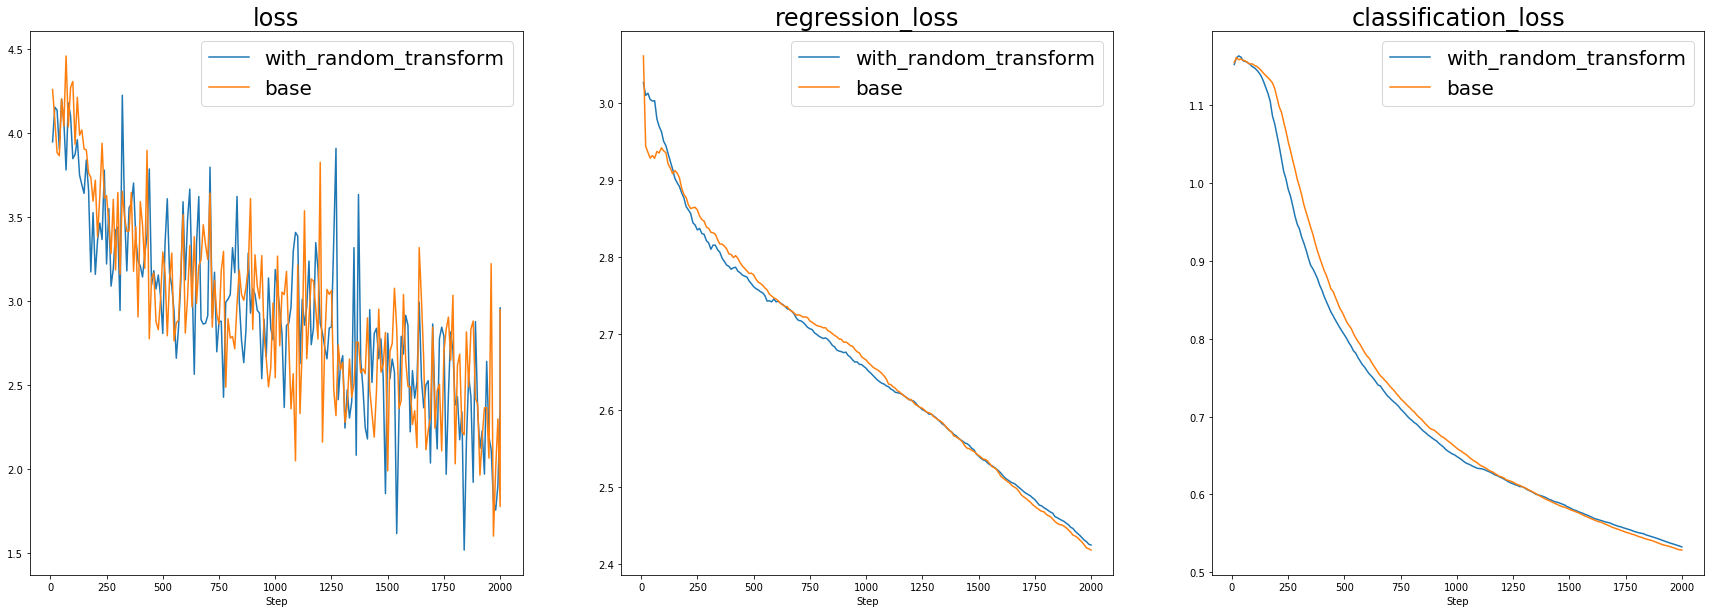

In [93]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'with_random_transform', base_dfs)

### Learning rate 1e-4

Compare to training with lr=1e-4 Command to run:<br><br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000 --lr 0.0001 --tensorboard-dir logs/finetuning/lr_1e-4 pascal /storage/data/LADDV4_Full >> logs/finetuning/lr_1e-4/output.log</i>

In [94]:
prefix='lr_1e-4-'

In [95]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.86 (> base 0.6253)


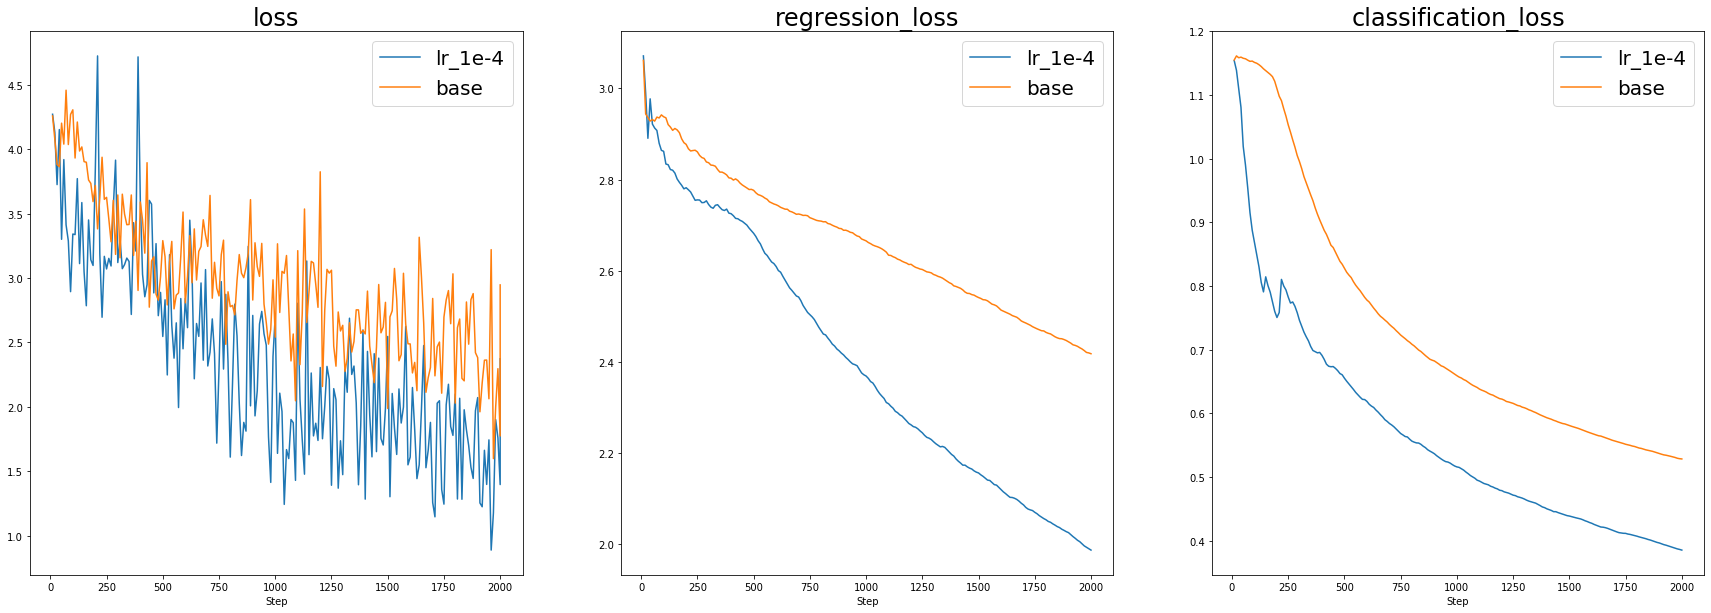

In [96]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'lr_1e-4', base_dfs)

### Learning rate 1e-6

Compare to training with lr=1e-6 Command to run:<br><br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000 --lr 0.000001 --tensorboard-dir logs/finetuning/lr_1e-6 pascal /storage/data/LADDV4_Full >> logs/finetuning/lr_1e-6/output.log</i>

In [97]:
prefix='lr_1e-6-'

In [98]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.08085 (< base 0.6253)


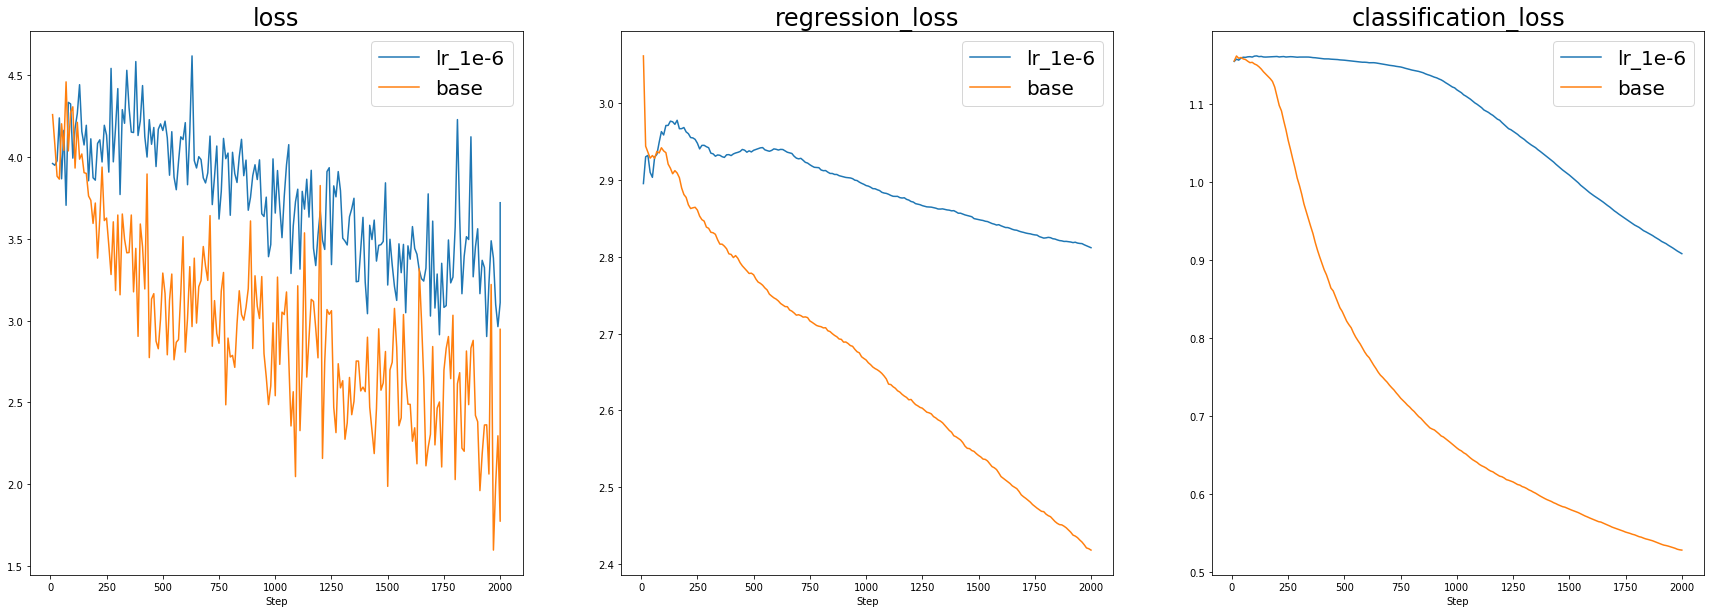

In [99]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'lr_1e-6', base_dfs)

### Focal gamma 5.0

Compare to training with lr=1e-6 Command to run:<br><br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000 --focal-gamma 5.0 --tensorboard-dir logs/finetuning/gamma_5 pascal /storage/data/LADDV4_Full >> logs/finetuning/gamma_5/output.log</i>

In [101]:
prefix='gamma_5-'

In [102]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.3497 (< base 0.6253)


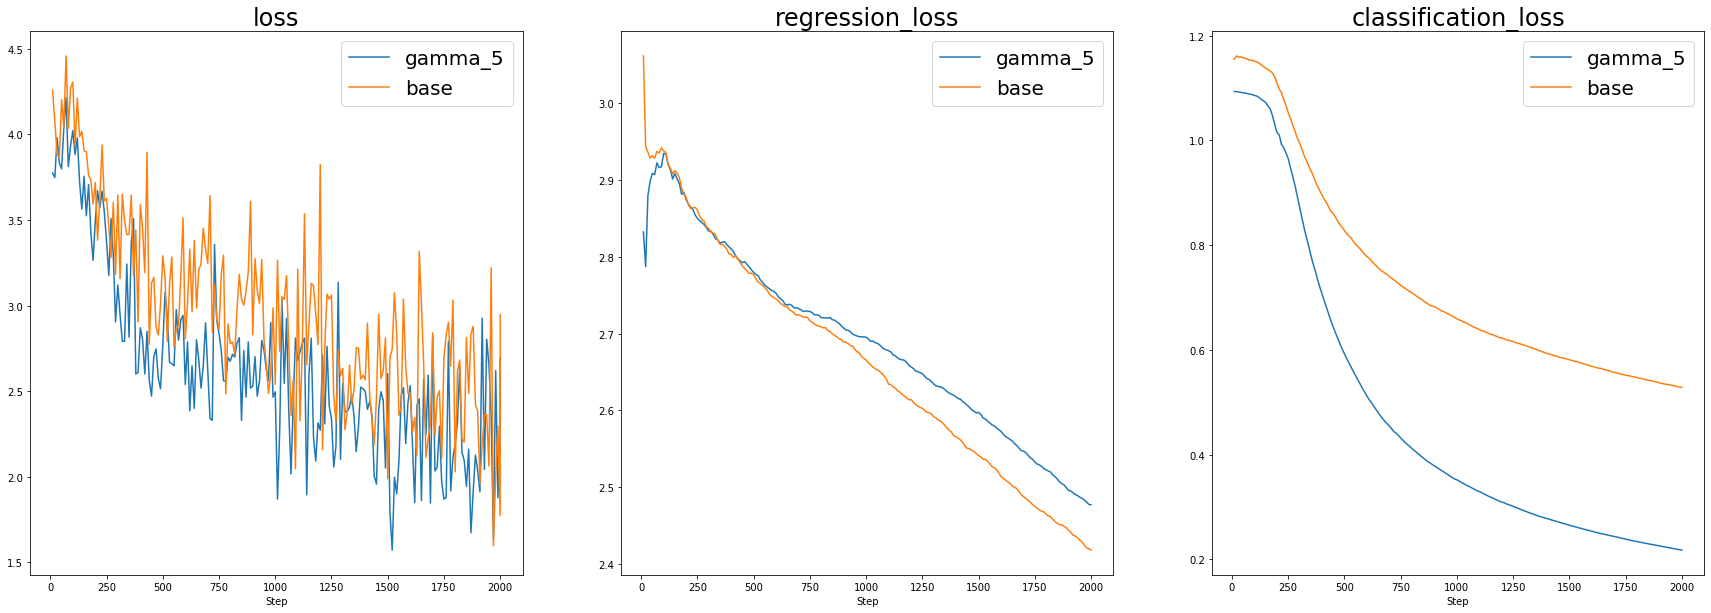

In [103]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'gamma_5', base_dfs)

### Focal gamma 3.0

<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000 --focal-gamma 3.0 --tensorboard-dir logs/finetuning_part2/gamma_3 pascal /storage/data/LADDV4_Full >> logs/finetuning_part2/gamma_3/output.log</i>

In [120]:
prefix='gamma_3-'

In [121]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.5754 (< base 0.6253)


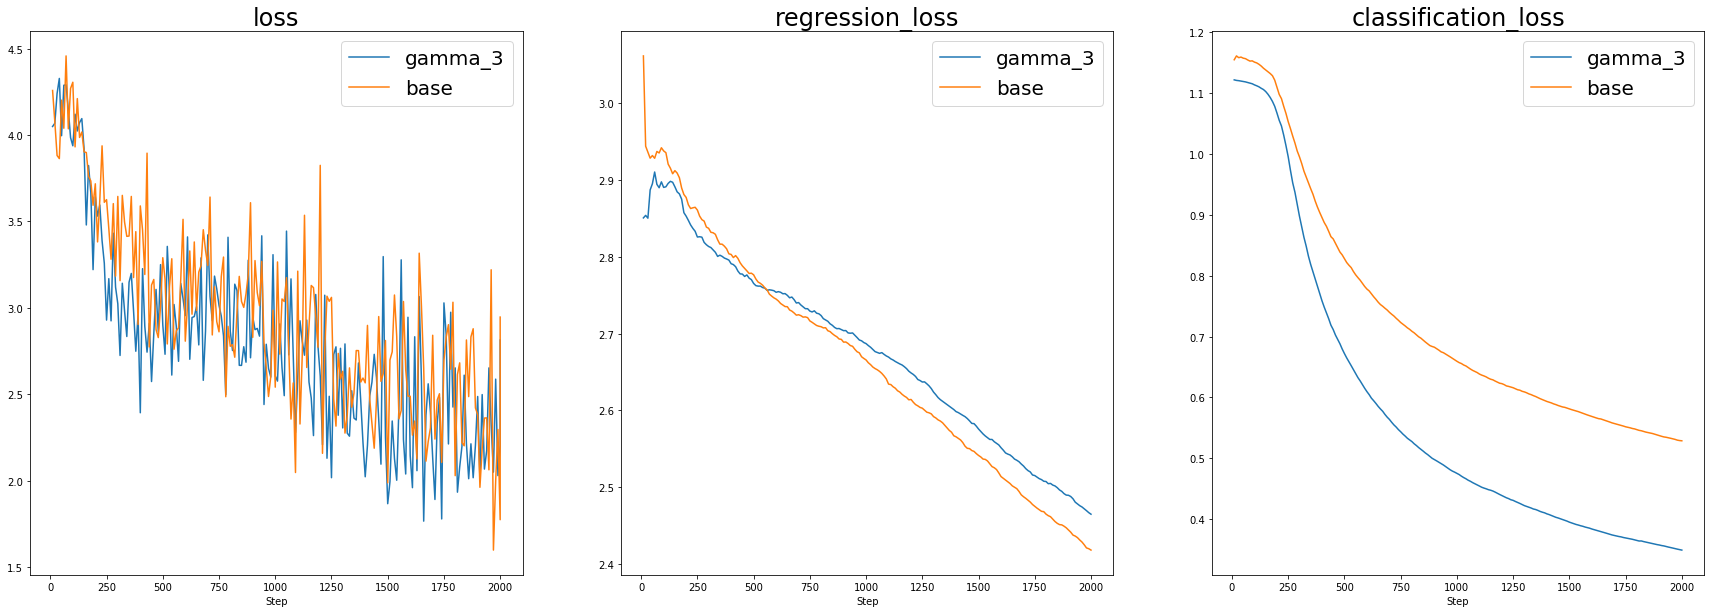

In [122]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'gamma_3', base_dfs)

### Focal alpha 0.5

<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000 --focal-alpha 0.5 --tensorboard-dir logs/finetuning/alpha pascal /storage/data/LADDV4_Full >> logs/finetuning/alpha/output.log<i>

In [107]:
prefix='alpha-'

In [108]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.6678 (> base 0.6253)


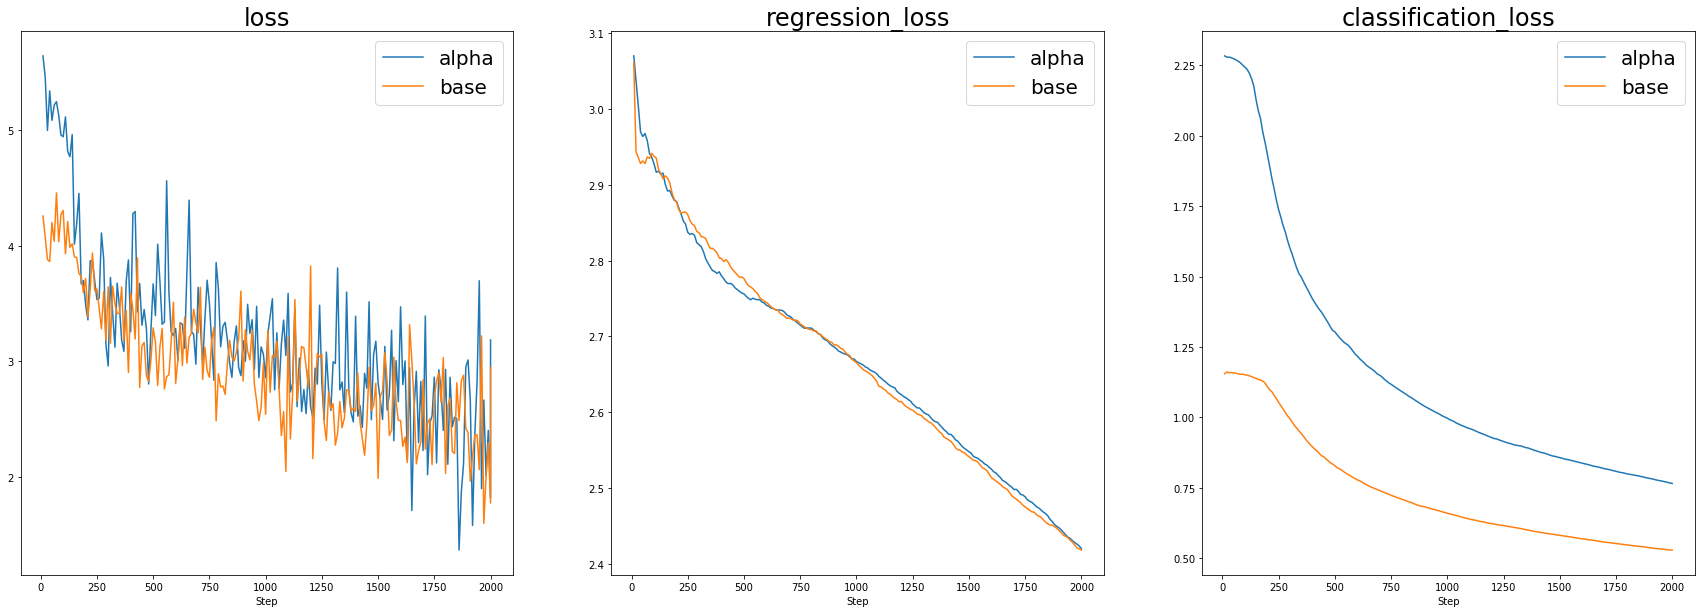

In [109]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'alpha', base_dfs)

### Weighted loss

<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000 --regression-weight 0.5 --classification-weight 2.0  --tensorboard-dir logs/finetuning/weighted_loss pascal /storage/data/LADDV4_Full >> logs/finetuning/weighted_loss/output.log<i>

In [110]:
prefix='weighted_loss-'

In [111]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.6848 (> base 0.6253)


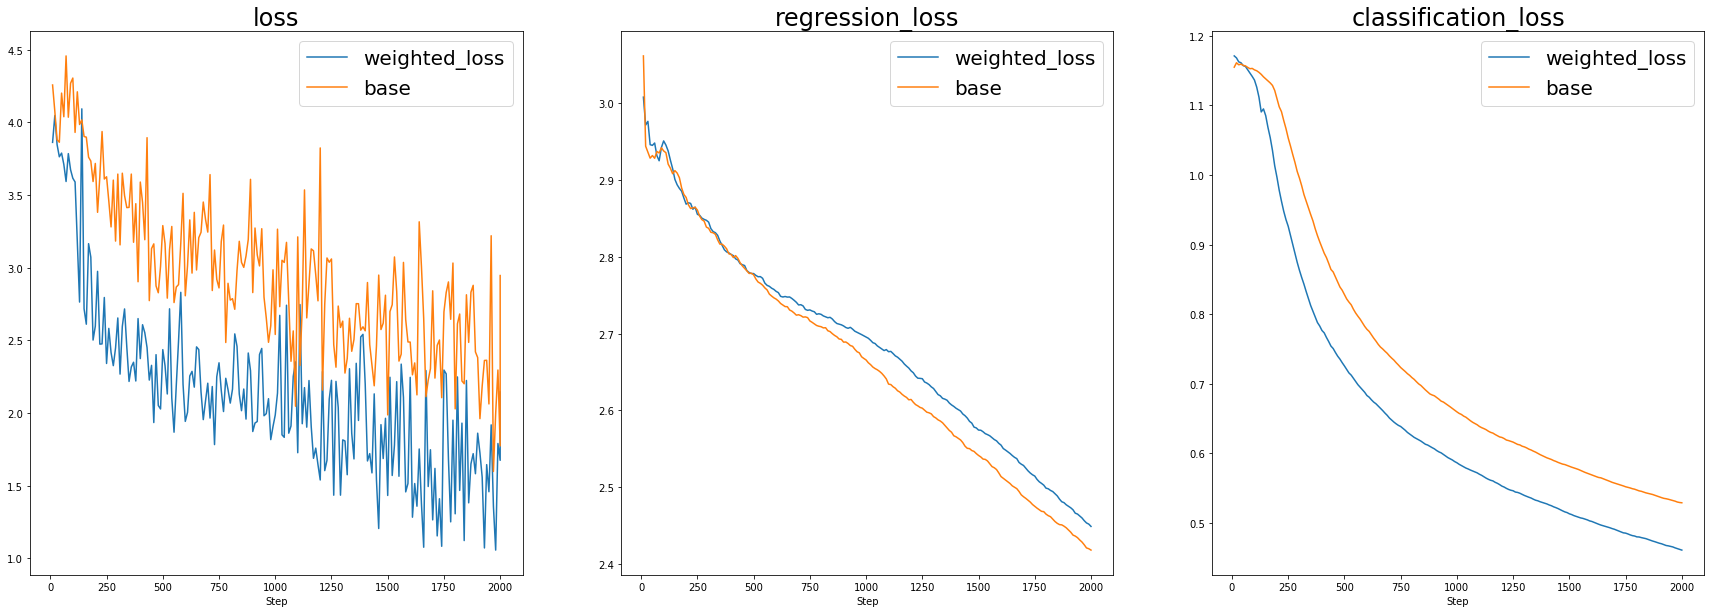

In [113]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'weighted_loss', base_dfs)

### Optimizer clipnorm

<i>keras_retinanet/bin/train.py --epoch 1 --steps 1000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 2 --image-min-side 1500 --image-max-side 2000 --optimizer-clipnorm 0.01 --tensorboard-dir logs/finetuning/clipnorm pascal /storage/data/LADDV4_Full >> logs/finetuning/clipnorm/output.log<i>

In [114]:
prefix='clipnorm-'

In [115]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.774 (> base 0.6253)


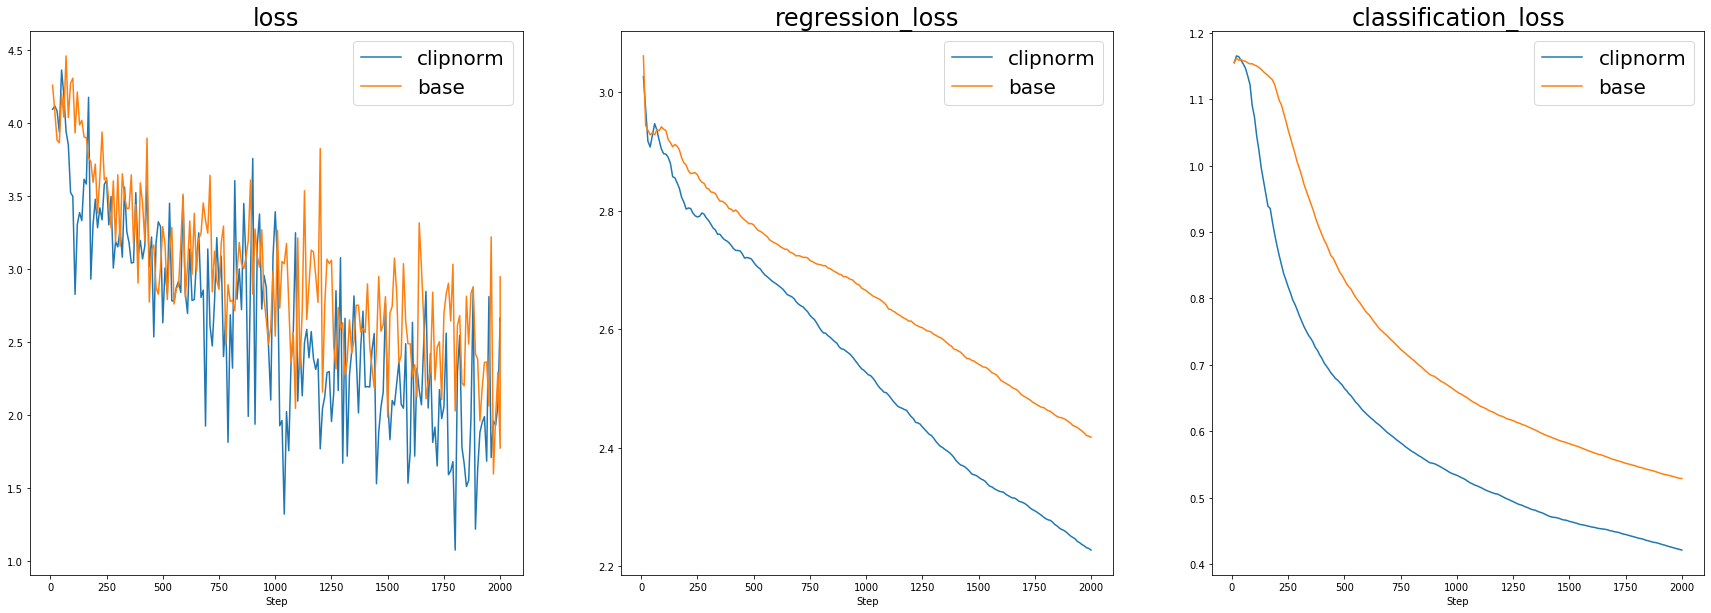

In [116]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'clipnorm', base_dfs)

## Combined model

In sum, the following parameters were selected to train the first epoch:
<ul>
<li>image-min-side 1500, image-max-side 2000</li>
<li>batch-size 1</li>
<li>lr 1e-4</li>
<li>regression-weight 0.5, classification-weight 2.0</li>
<li>optimizer-clipnorm 0.01</li>
</ul>
<br>
<i>keras_retinanet/bin/train.py --epoch 1 --steps 2000 --tensorboard-freq 10 --config config.ini --no-snapshots --no-random-transform --batch-size 1 --lr 0.0001 --image-min-side 1500 --image-max-side 2000 --regression-weight 0.5 --classification-weight 2.0 --optimizer-clipnorm 0.01 --tensorboard-dir logs/combined_model pascal /storage/data/LADDV4_Full >> logs/combined_model/output.log</i>

In [117]:
prefix='combined_model-'

In [118]:
mAP = load_mAP(csv_dir, prefix)
print_mAP(mAP, base_mAP)

mAP: 0.7903 (> base 0.6253)


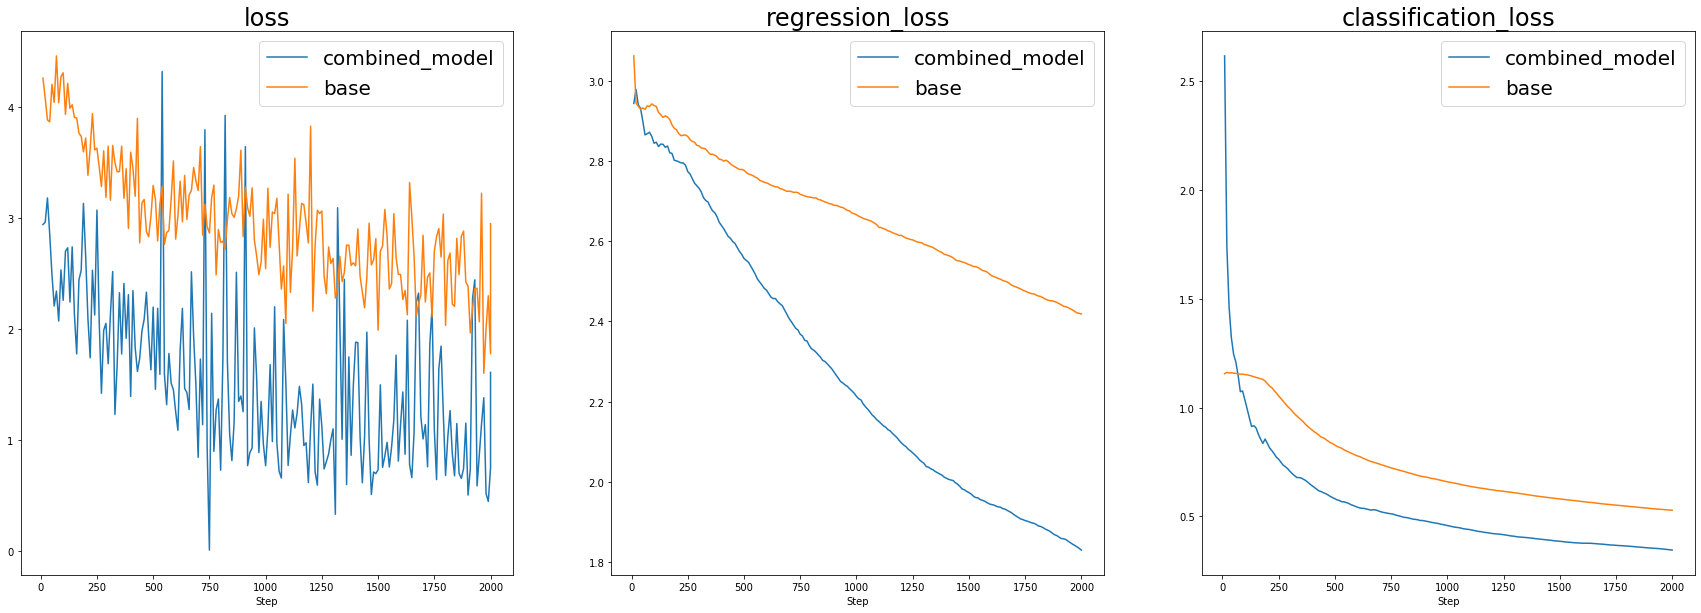

In [119]:
dfs = {metric: load_dataframe(csv_dir, prefix, metric) for metric in loss_metrics}
plot_metrics(dfs, 'combined_model', base_dfs)

### Results

Results after first epoch:<br><br>
10000/10000 [==============================] - 6221s 622ms/step - loss: 0.9016 - regression_loss: 1.1128 - classification_loss: 0.1726<br>
280 instances of class Pedestrian with average precision: 0.9333<br>
<b>mAP: 0.9333</b>